In [3]:
1. Undestanding the problem
2. EDA
3. Data Preprocessing
4. Feature Selection  
5. Modeling 
6. Evaluation.

SyntaxError: invalid syntax (1702975513.py, line 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#Data sourcing
data=pd.read_csv("USA_Housing.csv")

In [4]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
#EDA
print(data.columns)
data.info()
data.shape

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


(5000, 7)

In [6]:
#checking any null value
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
#checking duplicate value
data.duplicated().sum()

0

In [8]:
#statical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [9]:
#segreagte numerical or categorial
numeric_data = data.select_dtypes(exclude=['object'])
categorical_data = data.select_dtypes(include=['object'])

In [10]:
numeric_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [11]:
categorical_data

,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [12]:
#finding important features
correlation=data.corr()

In [13]:
correlation
#Price is the output i.e dependent one we can see Number of bedrooms have a very less correlated we can drop that column too in our analysis

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


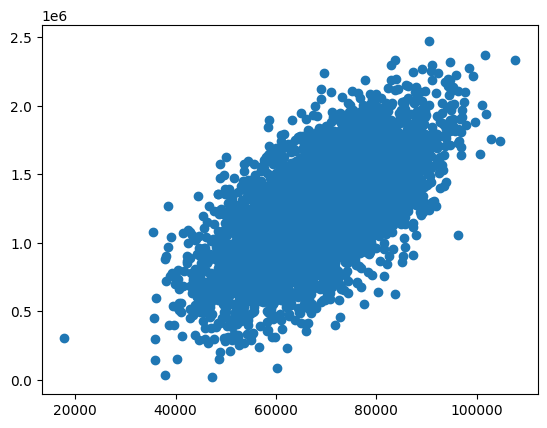

In [14]:
#Graphical analysis
#scatter plot (observe and show relationships between two numeric variables)
plt.scatter(data["Avg. Area Income"], data["Price"])

In [15]:
column_list=numeric_data.columns

In [16]:
plt.figure(figsize=(12, 8))  # Optional: set the figure size

for i in columns_list[:-1]:  # Exclude the last column (Price)
    plt.scatter(data[i], data['Price'], label=i)  # Plot each column against Price

    # Add labels for clarity
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {i} vs Price')
    plt.legend()

    # Show each plot
    plt.show()

NameError: name 'columns_list' is not defined

<Figure size 1200x800 with 0 Axes>

In [17]:
#scatter plot we can see everyone has linear relation with price except the no.of bedrooms and we can check for outliers also from plot

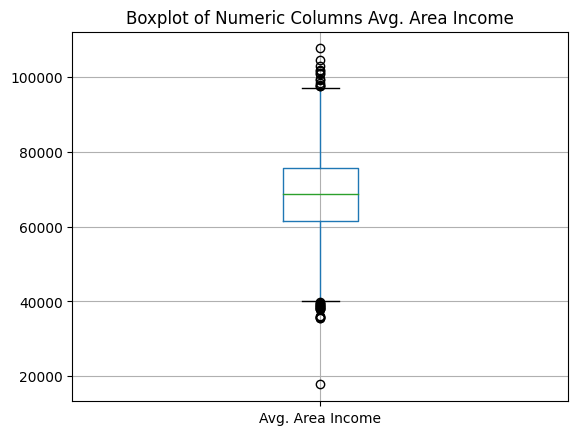

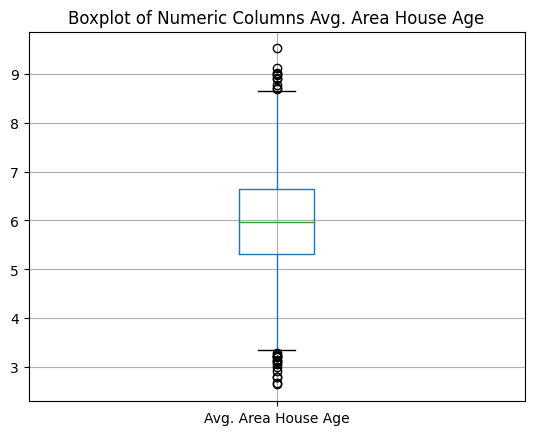

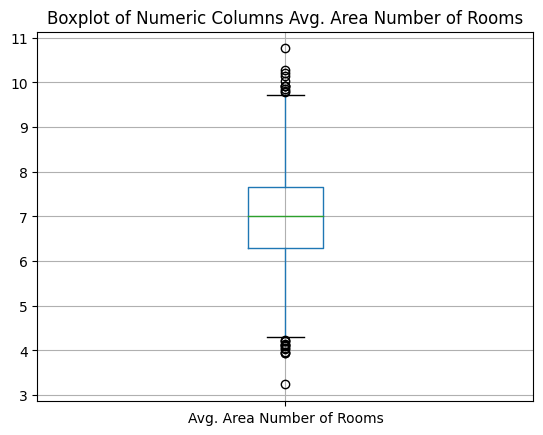

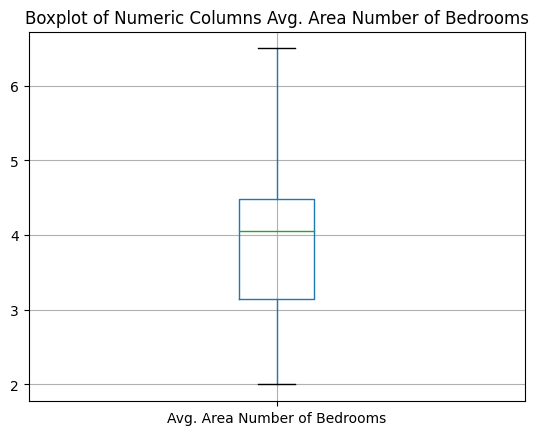

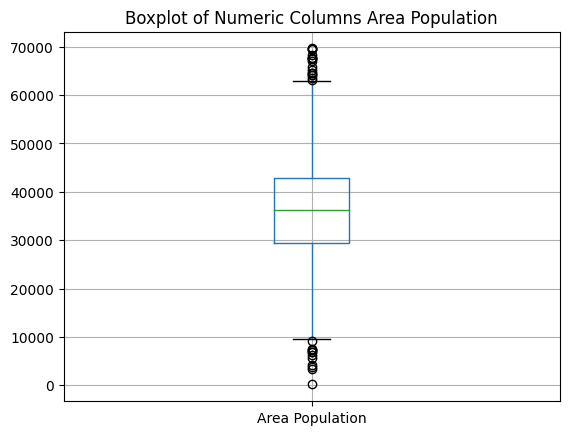

In [18]:
numeric_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                   'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

# Create boxplots for selected columns to check for outliers

for i in numeric_columns[:-1]:
    data.boxplot(column=[i])
    plt.title('Boxplot of Numeric Columns '+i)
    plt.show()
    # Exclude the last column (Price)
    



In [19]:
#we notice there are many outliers we will remove it in Pre processing

<AxesSubplot:>

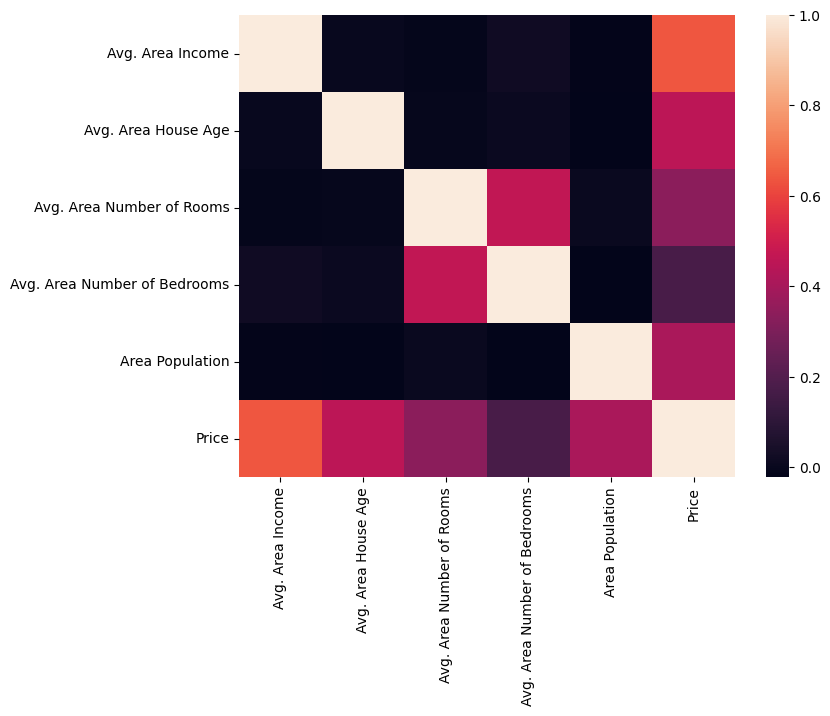

In [20]:
#plottinh heatmap
plt.figure(figsize=(8, 6))  # Set the figure size

sns.heatmap(correlation)


In [ ]:
#EDA analysis 
1.Price is output column and its dependent
2.6 indepedent variable we have
3. 5 numerical 1 categorial
4. from stats we can see no. of rooms can be dropped in Price predicton as 0.171071 score is this
5. scatter plot we see evry feature has linear relation with price except no. of rooms
6 . from the box plot we found there are outliers 
7. from stats analysis it has no null values and duplicated values 
8. from heat map we see see no. of rooms and Price less correlated and there is corrleation between no. of bedroom and no.of room but not that much that one can be dropped



In [ ]:
####Pre processing the data
#no missing value dont need to handle 
#there are outliers we need to remove that first


In [ ]:
#Removing outlier from "Avg. Area Income"
data = data[data["Avg. Area Income"] > 40000 ]
data = data[data["Avg. Area Income"] < 100000 ]

In [ ]:
#Removing outlier from "Avg. Area House Age"

data = data[data["Avg. Area House Age"] > 3.2 ]
data = data[data["Avg. Area House Age"] < 8.8 ]

In [ ]:
#Removing outlier from "Avg. Area Number of Rooms"

data = data[data["Avg. Area Number of Rooms"] > 4.2 ]
data = data[data["Avg. Area Number of Rooms"] < 9.8 ]

In [ ]:
#Removing outlier from "Area Population "

data = data[data["Area Population"] > 10000 ]
data = data[data["Area Population"] < 62000 ]

In [ ]:
data.info()

In [ ]:
#segreagte numerical or categorial
numeric_data = data.select_dtypes(exclude=['object'])
categorical_data = data.select_dtypes(include=['object'])

In [ ]:
#standarization (saling the data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
scaled_data = scaler.fit_transform(numeric_data)

In [ ]:
scaled_data.shape

In [20]:
##Training the Model
#1.Independent and dependent

In [21]:
numeric_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [22]:
numeric_data_x=numeric_data[numeric_data.columns[:-1]]#Independent features 5
numeric_data_y=numeric_data[numeric_data.columns[-1]]#Dependent feature

In [23]:
print(numeric_data_x)
print(numeric_data_y)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1  

In [24]:
# Dividing into training data and  test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numeric_data_x, numeric_data_y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(4000, 5)

In [26]:
y_train.shape

(4000,)

In [27]:
X_test.shape

(1000, 5)

In [28]:
y_test.shape

(1000,)

In [29]:
##standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
scaled_data_X_train = scaler.fit_transform(X_train)
scaled_data_X_test = scaler.transform(X_test)


In [30]:
scaled_data_X_train

array([[-0.19049241, -0.12817719, -0.13160635,  0.12038585, -0.82761782],
       [-1.38876401,  0.43080443,  0.80028487, -0.55648895,  1.15829878],
       [-0.35012392,  0.46680752,  1.70375078,  0.03067955, -0.31904298],
       ...,
       [-0.22335061,  0.53809182, -0.36489661, -0.68697084,  0.11908894],
       [-0.92417067,  1.43077434,  2.26846315,  0.2753331 ,  1.39018355],
       [-0.69357335, -0.07762332,  0.89219611,  1.67801341, -0.00681852]])

In [31]:
scaled_data_X_test

array([[-0.62396497,  1.05134233, -0.53493732, -0.59726454,  0.77509854],
       [-1.06752524,  0.92593776, -0.05804915, -0.69512596,  0.73880748],
       [ 0.14995479,  0.77674776, -0.31465336, -1.60849918, -0.69076777],
       ...,
       [ 1.16115701,  1.18417775,  0.25662849,  1.18870632,  0.93991305],
       [ 1.69832503,  0.56046124, -1.85607396, -1.54325824,  1.16585758],
       [-0.14145775, -1.04516314,  0.64633545,  0.8625016 , -0.40292631]])

In [32]:
##Model training by Linear resgression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(scaled_data_X_train,y_train)

LinearRegression()

In [33]:
#printing coef
regression.coef_

array([231741.87665217, 163580.77656614, 120724.77138745,   2992.44913541,
       152235.90009699])

In [34]:
regression.intercept_

1229576.99256009

In [35]:
###reg_prediction
reg_predict=regression.predict(scaled_data_X_test)


In [36]:
reg_predict

array([1308587.92699753, 1237037.22949428, 1243429.34030687,
       1228900.21360379, 1063320.9071082 , 1544058.05034856,
       1094774.70493022,  833284.72339228,  788412.85578724,
       1469714.86615707,  671728.43662066, 1606818.21977935,
       1004166.61331062, 1796798.97595927, 1288566.96221017,
       1087782.93301077, 1423072.37492526, 1078178.68169673,
        802286.03537901,  930761.03695714, 1134829.86477819,
        916398.42023136, 1489972.69335422, 1284580.15538819,
       1582071.3532273 , 1132519.15991993, 1089888.39644513,
        974510.51872158,  924057.96820669, 1740759.72092272,
       1286481.5951232 , 1621289.9517161 , 1435264.20161716,
       1234014.77924483, 1485434.57300368, 1718335.00753687,
       1538953.74882846,  777106.64791795, 1765201.52243617,
       1175972.1419982 , 1553707.94323484,  897703.67505177,
       1371049.80326608,  845281.72310358, 1201022.89803883,
       1133285.98450856, 1363128.14557352, 1449814.08768269,
       1574363.90467353,

In [37]:
reg_predict.shape

(1000,)

In [38]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_predict))
print(mean_absolute_error(y_test,reg_predict))
print(np.sqrt(mean_squared_error(y_test,reg_predict)))

10089009300.893991
80879.09723489445
100444.06055558483


In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_predict)
print(score)

0.9179971706834331


In [40]:

#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9175846816023638

In [41]:
##Ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(scaled_data_X_train,y_train)
ridge_predict=ridge.predict(scaled_data_X_test)


In [42]:
ridge_predict=ridge.predict(scaled_data_X_test)

In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9179972203628644
0.9175847315316916


In [44]:
##lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(scaled_data_X_train,y_train)
lasso_predict=lasso.predict(scaled_data_X_test)


In [45]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9179972521079874
0.9175847634364984


In [46]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(scaled_data_X_train,y_train)
svr_predict=svr.predict(scaled_data_X_test)


In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,svr_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

-0.0010365122532220994
-0.006071907184073355


In [48]:
#no benefit of hypertuning too bad model

# Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dt_regressor = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
dt_regressor.fit(scaled_data_X_train,y_train)
dt_predict=dt_regressor.predict(scaled_data_X_test)


In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_test,dt_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.737244838629525
0.735923132586414


Hyperparameter tuning in DTR

In [51]:
 grid_params='criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']

SyntaxError: invalid syntax (3387160909.py, line 1)

# RANDOM FOREST



In [ ]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestRegressor
rand_regressor= RandomForestRegressor()
rand_regressor.fit(scaled_data_X_train,y_train)
rand_predict=rand_regressor.predict(scaled_data_X_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,rand_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

ADABOOST


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADA_regressor= AdaBoostRegressor()
ADA_regressor.fit(scaled_data_X_train,y_train)
ADA_predict=ADA_regressor.predict(scaled_data_X_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ADA_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_regressor= GradientBoostingRegressor()
Gradient_regressor.fit(scaled_data_X_train,y_train)
Gradient_predict= Gradient_regressor.predict(scaled_data_X_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Gradient_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
XGBBOOST

In [52]:
import xgboost

In [53]:
xgb=xgboost.XGBRegressor()

In [54]:
xgb.fit(scaled_data_X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
xgb_predict= xgb.predict(scaled_data_X_test)

In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_test,xgb_predict)
print(score)

#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8843894666148114
0.8838079246963748
